<a href="https://colab.research.google.com/github/AJamal27891/Recommendation_system/blob/main/Recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!unzip /content/drive/MyDrive/data.zip 

Archive:  /content/drive/MyDrive/data.zip
replace data/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: data/.DS_Store          
  inflating: __MACOSX/data/._.DS_Store  
  inflating: data/events.json        
  inflating: __MACOSX/data/._events.json  
  inflating: data/meta.json          
  inflating: __MACOSX/data/._meta.json  


In [3]:
import pandas as pd 
events = pd.read_json(r'/content/data/events.json')

In [4]:
events.events.to_json(r'events.json')

In [5]:
events = pd.read_json(r'events.json')

In [6]:
events= events.T

In [7]:
events

,event,sessionid,eventtime,price,productid
0,cart,a0655eee-1267-4820-af21-ad8ac068ff7a,2020-06-01T08:59:16.406Z,14.48,HBV00000NVZE8
1,cart,d2ea7bd3-9235-4a9f-a9ea-d7f296e71318,2020-06-01T08:59:46.580Z,49.90,HBV00000U2B18
2,cart,5e594788-78a0-44dd-8e66-37022d48f691,2020-06-01T08:59:33.308Z,1.99,OFIS3101-080
3,cart,fdfeb652-22fa-4153-b9b5-4dfa0dcaffdf,2020-06-01T08:59:31.911Z,2.25,HBV00000NVZBW
4,cart,9e9d4f7e-898c-40fb-aae9-256c40779933,2020-06-01T08:59:33.888Z,9.95,HBV00000NE0T4
...,...,...,...,...,...
387651,cart,0ce386d3-f9ae-46b1-a018-baa5ea91be0c,2020-06-15T03:55:05.322Z,19.90,HBV00000OE884
387652,cart,69be07e4-737d-4935-b2eb-e02ecd94986b,2020-06-15T03:56:50.064Z,9.95,HBV00000OE8AU
387653,cart,25f6960c-0144-419d-8761-2b539c75c9c9,2020-06-15T03:03:23.859Z,21.95,HBV00000PQM1C
387654,cart,eebd42a5-2d95-41b9-bc10-83db56ba3989,2020-06-15T03:29:54.865Z,17.50,HBV00000NFHXT


In [8]:
meta = pd.read_json(r'/content/data/meta.json')

In [9]:
meta.meta.to_json(r'meta.json')
meta = pd.read_json(r'meta.json').T
meta

,productid,brand,category,subcategory,name
0,HBV00000AX6LR,Palette,Kişisel Bakım,Saç Bakımı,Palette Kalıcı Doğal Renkler 10-4 PAPATYA
1,HBV00000BSAQG,Best,Pet Shop,Kedi,Best Pet Jöle İçinde Parça Etli Somonlu Konser...
2,HBV00000JUHBA,Tarım Kredi,Temel Gıda,"Bakliyat, Pirinç, Makarna",Türkiye Tarım Kredi Koop.Yeşil Mercimek 1 kg
3,HBV00000NE0QI,Namet,"Et, Balık, Şarküteri",Şarküteri,Namet Fıstıklı Macar Salam 100 gr
4,HBV00000NE0UQ,Muratbey,Kahvaltılık ve Süt,Peynir,Muratbey Burgu Peyniri 250 gr
...,...,...,...,...,...
10231,ZYHPREISBBKL008,Reis,Temel Gıda,"Bakliyat, Pirinç, Makarna",Reis Gönen Baldo Pirinç 1 kg
10232,ZYNES11470137,Nescafe,İçecekler,Kahve,Nescafé Classic Çözünebilir Kahve 200gr Ekopaket
10233,ZYPAREX1909309,Parex,Ev Bakım ve Temizlik,Ev Temizlik Ürünleri,Parex Powerball Çizmez Ovma Teli
10234,ZYPAREX2107986,Parex,Ev Bakım ve Temizlik,Yüzey Temizleyiciler,Parex Tornado Döner Başlıklı Temizlik Seti


In [10]:
events.describe()

,event,sessionid,eventtime,price,productid
count,387656,387656,387656,387650,387650
unique,1,54442,387196,1217,10235
top,cart,08a906d4-4999-403c-a334-d296106d49cf,2020-06-15T13:50:03.378Z,18.48,HBV00000NVZGU
freq,387656,308,3,16750,17082


In [11]:
meta.describe()

,productid,brand,category,subcategory,name
count,10235,9777,10235,10235,10235
unique,10235,789,20,132,10123
top,HBV00000PV6R7,Carrefour,Atıştırmalık,Saç Bakımı,Carrefour Yumurta 30'lu M Boy
freq,1,396,1113,556,3


In [12]:
data = events.merge(meta,left_on='productid',right_on='productid')
data.describe().T

,count,unique,top,freq
event,387656,1,cart,387656
sessionid,387656,54442,08a906d4-4999-403c-a334-d296106d49cf,308
eventtime,387656,387196,2020-06-10T13:05:10.583Z,3
price,387650,1217,18.48,16750
productid,387650,10235,HBV00000NVZGU,17082
brand,255805,789,Carrefour,36683
category,387650,20,Meyve ve Sebze,76021
subcategory,387650,132,Sebze,47590
name,387650,10123,Dana Biftek 250 gr,17082


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387656 entries, 0 to 387655
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   event        387656 non-null  object
 1   sessionid    387656 non-null  object
 2   eventtime    387656 non-null  object
 3   price        387650 non-null  object
 4   productid    387650 non-null  object
 5   brand        255805 non-null  object
 6   category     387650 non-null  object
 7   subcategory  387650 non-null  object
 8   name         387650 non-null  object
dtypes: object(9)
memory usage: 29.6+ MB


In [14]:
# calculate freq patterns data
fp_data = data[['sessionid','productid']]
fp_data = fp_data.groupby(['sessionid','productid']).size().unstack(fill_value=0).astype(bool)


In [15]:
fp_data.head(5)

productid,AILEBIZIZSMTLDGY54,AILEBIZIZSMTLDHB18,AILEBS179526,AILEBSHSB22037,AILEDALIN275101,AILEDALIN275103,AILEDALIN275105,AILEDALIN275106,AILEDALIN275107,AILEDALIN275114,AILEDALIN275122,AILEDALIN275169,AILEEBBKB-56556,AILEEBBKR-W4472,AILEELITDIS5285B,AILEELITDIS5288B,AILEETI1811300,AILEETI3511300,AILEETI5311300,AILEFIMAN5299094,AILEHDMAR8967772,AILEHDMAR8967774,AILEHDMAR8967775,AILEHDMAR8967777,AILEHDMAR8967779,AILEHERO0595800,AILEHERO0595801,AILEHERO0598801,AILEHIPPTR2087,AILEHIPPTR2342,AILEHIPPTR2468,AILEHIPPTR2473,AILEHIPPTR2477,AILEHIPPTR2769,AILEHIPPTR2963,AILEHIPPTR3141,AILEHIPPTR3331,AILEHIPPTR3551,AILEHIPPTR4202,AILEHIPPTR4212,...,ZYUNIL21026733,ZYUNIL21032491,ZYUNIL21038893,ZYUNIL21042007,ZYUNIL21108636,ZYUNIL21122153,ZYUNIL21127366,ZYUNIL21127405,ZYUNIL21127409,ZYUNIL21129933,ZYUNIL21166551,ZYUNIL21166552,ZYUNIL21166554,ZYUNIL581595,ZYUNIL70003152,ZYUNIL70003580,ZYUNIL70003656,ZYUNIL70003657,ZYUNIL70004274,ZYUNIL70005997,ZYUNIL70006848,ZYUNIL70006862,ZYUNIL70006863,ZYUNIL70006868,ZYUNIL70009140,ZYUNIL70009454,ZYUNIL70020865,ZYUNIL70021056,ZYUNIL70021119,ZYUNIL70021126,ZYUNIL798204,ZYUNIL798280,ZYUNMASEKM007,ZYUNMASEKM008,ZYUNMASEKM065,ZYUZAY1074,ZYUZAY1166,ZYUZAY1272,ZYVLEDASUN003,ZYWAX12117
sessionid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
000280f4-62fc-4dcd-b51d-c66ac14d7d8c,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
0002e53b-1f60-4309-8380-31ca03de51f8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
0002ef34-6bee-4953-874b-8298ec26b625,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
000618de-d415-408c-863e-6124db43f529,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
000770d6-c2d4-4ad2-bb2c-b35274bc5e7e,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
!pip install mlxtend==0.17.0

In [17]:
import mlxtend
print(mlxtend.__version__)

0.17.0


In [18]:
from mlxtend.frequent_patterns import fpgrowth 
fb_data = fpgrowth(fp_data, min_support=0.00002, use_colnames=True,max_len=2)

In [19]:
from mlxtend.frequent_patterns import association_rules
fb_rules = association_rules(fb_data, metric="confidence", min_threshold=0.70)

In [20]:
fb_rules.describe()

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


,antecedent support,consequent support,support,confidence,lift,leverage,conviction
count,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000
mean,0.000050,0.005577,0.000046,0.967138,4565.791940,0.000046,inf
std,0.000080,0.011205,0.000059,0.083295,6047.425923,0.000058,NaN
min,0.000037,0.000037,0.000037,0.700000,17.404731,0.000035,3.330211
25%,0.000037,0.000156,0.000037,1.000000,300.468984,0.000037,inf
50%,0.000037,0.000441,0.000037,1.000000,2177.680000,0.000037,NaN
75%,0.000037,0.003169,0.000037,1.000000,6049.111111,0.000037,inf
max,0.001892,0.045020,0.001396,1.000000,27221.000000,0.001377,inf


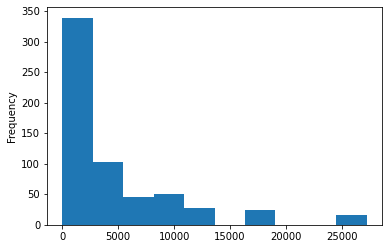

In [21]:
fb_rules.lift.plot(kind='hist')

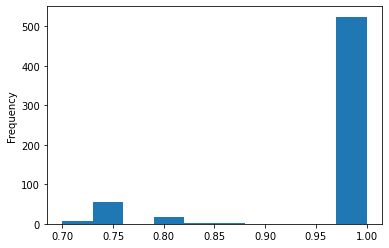

In [22]:
fb_rules.confidence.plot(kind='hist')

In [23]:
fb_rules.columns

Index(['antecedents', 'consequents', 'antecedent support',
       'consequent support', 'support', 'confidence', 'lift', 'leverage',
       'conviction'],
      dtype='object')

In [24]:
fb_rules = fb_rules[['antecedents','consequents','confidence']]
fb_rules.antecedents  = fb_rules.antecedents.apply(lambda x:list(x)[0]).astype("unicode")
fb_rules.consequents  = fb_rules.consequents.apply(lambda x:list(x)[0]).astype("unicode")

In [25]:
#lift and right tabel 
fb_rules

,antecedents,consequents,confidence
0,HBV00000TDWF9,HBV00000O2S62,0.75
1,HBV00000PVBAH,HBV00000PQKET,0.75
2,HBV00000U278U,HBV00000NVZBI,0.75
3,HBV00000QU45B,HBV000008SJZC,1.00
4,HBV00000QU45B,HBV000008SJWO,1.00
...,...,...,...
602,HBV00000PV8IF,HBV00000U2B97,1.00
603,HBV00000U2B97,HBV00000PV8IF,1.00
604,HBV0000097EJO,ZYBENC336876,1.00
605,HRTEK3TEKIS604,HBV00000PVQBT,1.00


In [26]:
#merging 
fb_merged = fb_rules.merge(meta,left_on='antecedents',right_on='productid',suffixes=(None,"_left"))
fb_merged = fb_merged.merge(meta,left_on='consequents',right_on='productid',suffixes=(None,"_right"))

fb_merged

,antecedents,consequents,confidence,productid,brand,category,subcategory,name,productid_right,brand_right,category_right,subcategory_right,name_right
0,HBV00000TDWF9,HBV00000O2S62,0.75,HBV00000TDWF9,Tek Lezzet,Pratik Yemekler,Hazır Yemekler,Tek Lezzet Bal Kabağı Püresi Kavanoz 320 gr,HBV00000O2S62,None,Meyve ve Sebze,Meyve,Çilek 250 gr
1,HBV00000SP8AZ,HBV00000O2S62,0.75,HBV00000SP8AZ,Tat,Temel Gıda,Salça ve Hazır Soslar,Tat Ranch Sos 220 gr,HBV00000O2S62,None,Meyve ve Sebze,Meyve,Çilek 250 gr
2,HBV00000PV5O6,HBV00000O2S62,1.00,HBV00000PV5O6,Arifoğlu,Temel Gıda,Salça ve Hazır Soslar,Arifoğlu Nar Ekşisi 750 g,HBV00000O2S62,None,Meyve ve Sebze,Meyve,Çilek 250 gr
3,HBV00000OE7U3,HBV00000O2S62,0.75,HBV00000OE7U3,None,Meyve ve Sebze,Meyve,Çağla 250 gr,HBV00000O2S62,None,Meyve ve Sebze,Meyve,Çilek 250 gr
4,HBV00000QX1YQ,HBV00000O2S62,1.00,HBV00000QX1YQ,Lezita,"Et, Balık, Şarküteri",Şarküteri,Lezita Nugget 300 gr,HBV00000O2S62,None,Meyve ve Sebze,Meyve,Çilek 250 gr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,HBV00000PV8IF,HBV00000U2B97,1.00,HBV00000PV8IF,Hipp,Bebek,Biberon Mamaları,Hipp Organik Sütlü Meyveli Ek Gıda 250 g,HBV00000U2B97,Hipp,Bebek,Biberon Mamaları,Hipp Organik Yoğurtlu Meyveli Tahıl Bazlı Ek g...
603,HBV00000U2B97,HBV00000PV8IF,1.00,HBV00000U2B97,Hipp,Bebek,Biberon Mamaları,Hipp Organik Yoğurtlu Meyveli Tahıl Bazlı Ek g...,HBV00000PV8IF,Hipp,Bebek,Biberon Mamaları,Hipp Organik Sütlü Meyveli Ek Gıda 250 g
604,HBV0000097EJO,ZYBENC336876,1.00,HBV0000097EJO,Mr. Muscle,Ev Bakım ve Temizlik,Mutfak Ve Banyo Ürünleri,Mr Muscle Promo Mutfak Temizleyici Limon 750 m...,ZYBENC336876,Marc,Ev Bakım ve Temizlik,Mutfak Ve Banyo Ürünleri,Marc Banyo ve Mutfak Temizleyici Yağ Çözücü & ...
605,HRTEK3TEKIS604,HBV00000PVQBT,1.00,HRTEK3TEKIS604,TEK-İŞ,Ev Yaşam ve Bahçe,"Hırdavat, Kablo ve Aksesuarlar",Tek-İş - Klasik Üçlü Fiş,HBV00000PVQBT,Tekis,Ev Yaşam ve Bahçe,"Hırdavat, Kablo ve Aksesuarlar",Golyat Üçlü Fiş


In [27]:
features_list = list(fb_merged.columns)
features_list.remove('confidence')

In [28]:
features = fb_merged[features_list].drop(['productid','productid_right'],axis=1)
features

,antecedents,consequents,brand,category,subcategory,name,brand_right,category_right,subcategory_right,name_right
0,HBV00000TDWF9,HBV00000O2S62,Tek Lezzet,Pratik Yemekler,Hazır Yemekler,Tek Lezzet Bal Kabağı Püresi Kavanoz 320 gr,None,Meyve ve Sebze,Meyve,Çilek 250 gr
1,HBV00000SP8AZ,HBV00000O2S62,Tat,Temel Gıda,Salça ve Hazır Soslar,Tat Ranch Sos 220 gr,None,Meyve ve Sebze,Meyve,Çilek 250 gr
2,HBV00000PV5O6,HBV00000O2S62,Arifoğlu,Temel Gıda,Salça ve Hazır Soslar,Arifoğlu Nar Ekşisi 750 g,None,Meyve ve Sebze,Meyve,Çilek 250 gr
3,HBV00000OE7U3,HBV00000O2S62,None,Meyve ve Sebze,Meyve,Çağla 250 gr,None,Meyve ve Sebze,Meyve,Çilek 250 gr
4,HBV00000QX1YQ,HBV00000O2S62,Lezita,"Et, Balık, Şarküteri",Şarküteri,Lezita Nugget 300 gr,None,Meyve ve Sebze,Meyve,Çilek 250 gr
...,...,...,...,...,...,...,...,...,...,...
602,HBV00000PV8IF,HBV00000U2B97,Hipp,Bebek,Biberon Mamaları,Hipp Organik Sütlü Meyveli Ek Gıda 250 g,Hipp,Bebek,Biberon Mamaları,Hipp Organik Yoğurtlu Meyveli Tahıl Bazlı Ek g...
603,HBV00000U2B97,HBV00000PV8IF,Hipp,Bebek,Biberon Mamaları,Hipp Organik Yoğurtlu Meyveli Tahıl Bazlı Ek g...,Hipp,Bebek,Biberon Mamaları,Hipp Organik Sütlü Meyveli Ek Gıda 250 g
604,HBV0000097EJO,ZYBENC336876,Mr. Muscle,Ev Bakım ve Temizlik,Mutfak Ve Banyo Ürünleri,Mr Muscle Promo Mutfak Temizleyici Limon 750 m...,Marc,Ev Bakım ve Temizlik,Mutfak Ve Banyo Ürünleri,Marc Banyo ve Mutfak Temizleyici Yağ Çözücü & ...
605,HRTEK3TEKIS604,HBV00000PVQBT,TEK-İŞ,Ev Yaşam ve Bahçe,"Hırdavat, Kablo ve Aksesuarlar",Tek-İş - Klasik Üçlü Fiş,Tekis,Ev Yaşam ve Bahçe,"Hırdavat, Kablo ve Aksesuarlar",Golyat Üçlü Fiş


In [29]:
fb_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   antecedents        607 non-null    object 
 1   consequents        607 non-null    object 
 2   confidence         607 non-null    float64
 3   productid          607 non-null    object 
 4   brand              570 non-null    object 
 5   category           607 non-null    object 
 6   subcategory        607 non-null    object 
 7   name               607 non-null    object 
 8   productid_right    607 non-null    object 
 9   brand_right        481 non-null    object 
 10  category_right     607 non-null    object 
 11  subcategory_right  607 non-null    object 
 12  name_right         607 non-null    object 
dtypes: float64(1), object(12)
memory usage: 66.4+ KB


In [30]:
fb_merged.values[0]

array(['HBV00000TDWF9', 'HBV00000O2S62', 0.75, 'HBV00000TDWF9',
       'Tek Lezzet', 'Pratik Yemekler', 'Hazır Yemekler',
       'Tek Lezzet Bal Kabağı Püresi Kavanoz 320 gr', 'HBV00000O2S62',
       None, 'Meyve ve Sebze', 'Meyve', 'Çilek 250 gr'], dtype=object)

In [31]:
features.values

array([['HBV00000TDWF9', 'HBV00000O2S62', 'Tek Lezzet', ...,
        'Meyve ve Sebze', 'Meyve', 'Çilek 250 gr'],
       ['HBV00000SP8AZ', 'HBV00000O2S62', 'Tat', ..., 'Meyve ve Sebze',
        'Meyve', 'Çilek 250 gr'],
       ['HBV00000PV5O6', 'HBV00000O2S62', 'Arifoğlu', ...,
        'Meyve ve Sebze', 'Meyve', 'Çilek 250 gr'],
       ...,
       ['HBV0000097EJO', 'ZYBENC336876', 'Mr. Muscle', ...,
        'Ev Bakım ve Temizlik', 'Mutfak Ve Banyo Ürünleri',
        "Marc Banyo ve Mutfak Temizleyici Yağ Çözücü & Kireç Sökücü Sprey 2'li Set (2x750 ml)"],
       ['HRTEK3TEKIS604', 'HBV00000PVQBT', 'TEK-İŞ', ...,
        'Ev Yaşam ve Bahçe', 'Hırdavat, Kablo ve Aksesuarlar',
        'Golyat Üçlü Fiş'],
       ['HBV00000PVQBT', 'HRTEK3TEKIS604', 'Tekis', ...,
        'Ev Yaşam ve Bahçe', 'Hırdavat, Kablo ve Aksesuarlar',
        'Tek-İş - Klasik Üçlü Fiş']], dtype=object)

In [32]:
#vectorizing using tfidf
corpus_list = []
for seq in features.values:
  try:
    x = ' '.join(seq)
    
  except :
    x = 'Empty' 
  corpus_list.append(x)
  

In [33]:
#split test and training 
test_size = .2 
train_features = corpus_list[:int(len(corpus_list)*(1-test_size))]
train_labels = fb_merged.confidence.values[:int(len(corpus_list)*(1-test_size))]

In [34]:
len(train_features) - len(train_labels)

0

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X= vectorizer.fit_transform(train_features)

In [36]:
X

<485x1864 sparse matrix of type '<class 'numpy.float64'>'
	with 6286 stored elements in Compressed Sparse Row format>

In [37]:
len(vectorizer.get_feature_names())

1864

In [38]:
encoded = vectorizer.transform(corpus_list[0].split())

In [39]:
decoded= vectorizer.inverse_transform(encoded)

In [41]:
train_features = [vectorizer.transform(train_features)]

In [42]:
X

<485x1864 sparse matrix of type '<class 'numpy.float64'>'
	with 6286 stored elements in Compressed Sparse Row format>

In [43]:
train_labels[0]

0.75

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import TruncatedSVD
pca = TruncatedSVD(70)
X = pca.fit_transform(X)
regressor = RandomForestRegressor()

In [45]:
import numpy as np
sum(pca.explained_variance_ratio_)

0.729356330120438

In [46]:
X[0]

array([ 1.00000000e+00, -1.34235794e-15, -3.44681522e-17, -2.19206472e-17,
        8.16121553e-17, -2.92990853e-17, -7.43468672e-18, -5.09563855e-17,
       -1.59404694e-18,  2.42720851e-17,  1.73985304e-17, -2.07585970e-17,
       -1.96773967e-17, -6.07866365e-17, -8.86174369e-18,  2.12123451e-17,
        6.67980228e-18, -2.24494517e-17,  1.70430077e-17, -4.68828289e-17,
        8.65595624e-17, -3.66714799e-17, -7.40784808e-17,  2.64734259e-18,
        5.55035015e-17,  1.22552459e-17, -5.82319089e-18, -1.76852443e-16,
       -4.82999006e-17,  1.35166351e-16, -3.03154736e-18, -5.17282554e-17,
       -4.92118158e-17, -1.58003389e-16,  3.61929320e-16,  4.25737519e-17,
       -1.88692335e-16, -2.65871231e-17, -4.93291850e-16,  1.69866738e-16,
       -1.90506369e-16,  1.07546001e-16, -1.24034999e-16,  5.49359373e-17,
       -6.34645447e-17,  1.02136041e-16, -3.81563023e-16,  9.84630336e-17,
       -1.02559717e-16,  5.36114607e-16, -2.39945779e-16,  5.78790091e-16,
        1.97793842e-16,  

In [47]:
regressor.fit(X, train_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [48]:
features_test = corpus_list[len(X):]
features_test = vectorizer.transform(features_test)
features_test = pca.transform(features_test)
labels_test = fb_merged.confidence.values[len(X):]
prediction = regressor.predict(features_test)


In [49]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(labels_test, prediction, squared=False)

In [50]:
rmse

0.04431610722075652

In [51]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [52]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [53]:
rf_random.fit(X, train_labels)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 13.9min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [54]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X, train_labels)
base_accuracy = evaluate(base_model, features_test, labels_test)

Model Performance
Average Error: 0.0287 degrees.
Accuracy = 97.01%.


In [55]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, features_test, labels_test)
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 0.0326 degrees.
Accuracy = 96.61%.
Improvement of -0.41%.


In [56]:
import joblib
joblib.dump(best_random, r'/content/data/resys.model')
joblib.dump(pca, r'/content/data/pca.model')
joblib.dump(vectorizer, r'/content/data/vectorizer.model')



['/content/data/vectorizer.model']

In [57]:
def get_productdata(id):
  if id in meta.productid.values:
    df = meta.rename(columns={'productid':'productid_right', 	'brand':'brand_right',
                              'category':'category_right', 	'subcategory':'subcategory_right', 'name':	'name_right'})
    df['antecedents'] = id
    df['consequents'] = meta.productid
    print(len(meta.productid))
    cols = ['productid', 	'brand', 	'category', 	'subcategory', 	'name']
    for c in cols :
      df[c] = meta[meta['productid'] == id ][c].values[0]

    df = df[['antecedents', 	'consequents', 	'productid', 	'brand', 	'category', 	'subcategory', 	'name',
            'productid_right', 	'brand_right', 'category_right',	'subcategory_right', 	'name_right']]
    return df
  else :
    return None

In [58]:
test = get_productdata('HBV00000JUHI4')

10236


In [59]:
def pipline(df):
  corpus_list = []
  for seq in df.values:
    try:
      x = ' '.join(seq)
    
    except :
      x = 'Empty' 
    corpus_list.append(x)
  features = vectorizer.transform(corpus_list)
  features = pca.transform(features)
  df['confidence'] = model.predict(features)
  df.sort_values('confidence',ascending=False)
  return df[['consequents','confidence']].values[:10],df['name_right'].values[:10]


In [60]:
model = joblib.load(r'/content/data/resys.model')
pca = joblib.load(r'/content/data/pca.model')
vectorizer = joblib.load(r'/content/data/vectorizer.model')

pipline(test)

(array([['HBV00000AX6LR', 0.9601098557346691],
        ['HBV00000BSAQG', 0.9639419149288961],
        ['HBV00000JUHBA', 0.9452157505833507],
        ['HBV00000NE0QI', 0.9557595583223845],
        ['HBV00000NE0UQ', 0.9606572607842],
        ['HBV00000NE1NR', 0.9594623407644068],
        ['HBV00000NH2LJ', 0.9651905144597164],
        ['HBV00000NVZ7D', 0.9553209946315134],
        ['HBV00000NVZCG', 0.9581529657690381],
        ['HBV00000OEL9Q', 0.9581529657690381]], dtype=object),
 array(['Palette Kalıcı Doğal Renkler 10-4 PAPATYA',
        'Best Pet Jöle İçinde Parça Etli Somonlu Konserve Yetişkin Kedi Maması 415 gr',
        'Türkiye Tarım Kredi Koop.Yeşil Mercimek 1 kg',
        'Namet Fıstıklı Macar Salam 100 gr',
        'Muratbey Burgu Peyniri 250 gr', 'Sek Quark Sade 140 g',
        'Sırmakeş Doğal Kaynak Suyu 1,5 lt',
        "Asil Fırın Gurme Cookie Çikolata 8'li",
        'Granny Smith Elma 500 gr', 'Ekşi Mayalı Ekmek 1 Kg'], dtype=object))